In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
calories = pd.read_csv('/content/calories.csv')
exercise = pd.read_csv('/content/exercise.csv')

In [4]:
calories.shape


(15000, 2)

In [5]:
exercise.shape

(15000, 8)

In [6]:
calories.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [7]:
calories.isnull().sum()

User_ID     0
Calories    0
dtype: int64

In [8]:
exercise.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

In [ ]:
exercise.isnull().sum()

In [10]:
exercise.replace({'Gender':{'male':0,'female':1}},inplace=True)

In [11]:
exercise.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363       0   68   190.0    94.0      29.0       105.0       40.8
1  14861698       1   20   166.0    60.0      14.0        94.0       40.3
2  11179863       0   69   179.0    79.0       5.0        88.0       38.7
3  16180408       1   34   179.0    71.0      13.0       100.0       40.5
4  17771927       1   27   154.0    58.0      10.0        81.0       39.8

In [17]:
sns.set()

In [18]:
sns.countplot('Gender',data=exercise)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


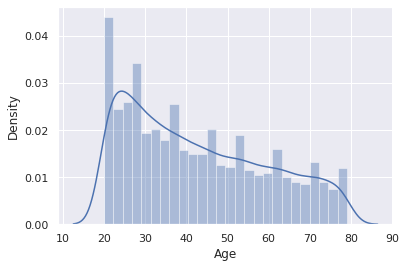

In [19]:
sns.distplot(exercise['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


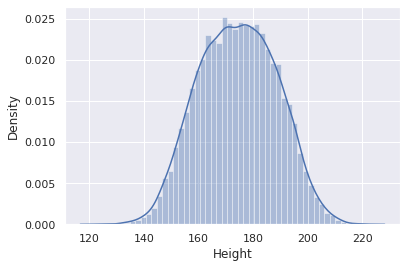

In [20]:
sns.distplot(exercise['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


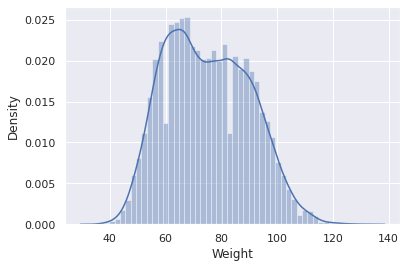

In [21]:
sns.distplot(exercise['Weight'])

In [13]:
X = exercise.drop(columns='User_ID',axis=1)
Y = calories.drop(columns='User_ID',axis=1)

In [14]:
print(X)
print(Y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]
       Calories
0         231.0
1          66.0
2          26.0
3          71.0
4          35.0
...         ...
14995      45.0
14996      23.0
14997      75.

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [16]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [22]:
model = XGBRegressor()

In [23]:
model.fit(X_train,Y_train)

[03:13:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [25]:
training_data_prediction = model.predict(X_train)
error_value = metrics.r2_score(Y_train,training_data_prediction)
print(error_value)

0.9966777021480265


In [26]:
test_data_prediction = model.predict(X_test)
error_value = metrics.r2_score(Y_test,test_data_prediction)
print(error_value)

0.9963065655529431


In [28]:
mae = metrics.mean_absolute_error(Y_test,test_data_prediction)
print(mae)

2.7159012502233186


In [32]:
input_data = (0 ,  68,   190.0,    94.0,      29.0,       105.0,       40.8)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

ValueError: ignored